In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [2]:
register_matplotlib_converters()

           Date       Close
2565 2020-10-19  214.220001
2566 2020-10-20  214.649994
2567 2020-10-21  214.800003
2568 2020-10-22  214.889999
2569 2020-10-23  216.229996


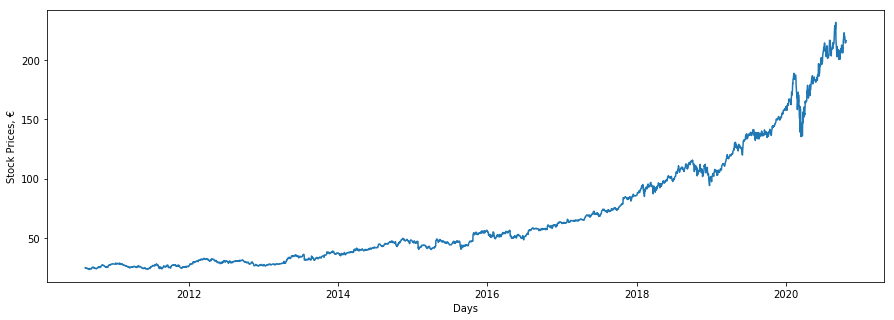

In [58]:
#Using scikit - different article - instead of quandl
start = datetime.datetime(2010,8,11)
end = datetime.datetime(2020,10,24)
prices = web.DataReader("MSFT", 'yahoo', start, end).reset_index(drop = False)[['Date', 'Close']]

print(prices.tail())
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

In [41]:
#--------------------------------------------------- GEOMETRIC BROWNIAN MOTION ------------------------------------------------

# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

start_date = '2010-08-11'
end_date = '2020-09-24'
pred_end_date = '2020-10-24'

#Using scikit - different article
#Change S_eon name
start = datetime.datetime(2010,8,11)
end = datetime.datetime(2020,9,24)
df_custom = web.DataReader("MSFT", 'yahoo', start, end).reset_index(drop = False)[['Date', 'Close']]
print(type(df_custom))

print(df_custom.head())
print(df_custom.tail())


<class 'pandas.core.frame.DataFrame'>
        Date      Close
0 2010-08-11  24.860001
1 2010-08-12  24.490000
2 2010-08-13  24.400000
3 2010-08-16  24.500000
4 2010-08-17  24.709999
           Date       Close
2544 2020-09-18  200.389999
2545 2020-09-21  202.539993
2546 2020-09-22  207.419998
2547 2020-09-23  200.589996
2548 2020-09-24  203.190002


In [42]:
returns = (df_custom.loc[1:, 'Close'] - \
           df_custom.shift(1).loc[1:, 'Close']) / \
           df_custom.shift(1).loc[1:, 'Close']
print(returns.tolist())

[-0.014883380134726634, -0.0036749756402215516, 0.004098376353816929, 0.00857139120296556, 0.004451663878072947, -0.015310200057973563, -0.008592511752552894, 0.0020636048433274046, -0.00988466904163511, 0.002495817955798387, -0.011618285569024216, 0.004617993776694473, -0.012118717585833876, -0.00719120476662895, 0.018321274723306444, 0.0016736785006611478, 0.01461989864920043, -0.0135859126643233, -0.001252035911650589, 0.0033430807641382115, -0.006663883627108182, 0.05283019743097338, -0.0031859785647745, 0.003595691175346601, 0.00835983588601922, -0.004342700777058203, 0.008326764375052514, -0.011010644250307742, -0.021471133851661967, -0.007314112178447844, 0.01432666300031011, -0.0020178023819073746, -0.0020218050135889917, -0.007293367218396362, -0.000408172607421875, -0.004491654200882832, -0.019278069299970953, 0.018402364569870145, 0.003285417759867239, 0.004093343439236074, 0.0016306158605403948, 0.0008140194551115547, 0.009760055698613166, 0.020539679035396257, -0.004340986

In [43]:
# Parameter Assignments
So = df_custom.loc[df_custom.shape[0] - 1, "Close"]
dt = 1 # day   # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


In [44]:
# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
print(drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

[0.00082487 0.00164974 0.0024746  0.00329947 0.00412434 0.00494921
 0.00577407 0.00659894 0.00742381 0.00824868 0.00907355 0.00989841
 0.01072328 0.01154815 0.01237302 0.01319788 0.01402275 0.01484762
 0.01567249 0.01649736 0.01732222]
{'1': array([ 1.07055487e-03, -2.02745413e-02, -4.09309155e-02,  1.30040766e-03,
        1.14779906e-02, -2.11815592e-03,  3.63269706e-03,  2.20425547e-02,
        3.79760302e-05,  7.50528937e-03, -1.00721394e-02, -1.96295695e-02,
       -7.46026461e-03, -5.66983692e-03, -3.37252279e-02, -7.60557356e-03,
       -2.91541060e-02, -4.55782532e-02, -7.02479688e-02, -7.83180462e-02,
       -7.25654273e-02]), '2': array([-0.02419693, -0.04949557, -0.02540032, -0.04849652, -0.03889064,
       -0.04446054, -0.04056358, -0.04261681, -0.03756914, -0.03737825,
       -0.06417695, -0.04762237, -0.05481091, -0.04948863, -0.04344835,
       -0.06553026,  0.00915528,  0.00825217, -0.00910962, -0.00795821,
       -0.00044029]), '3': array([ 0.01874126,  0.03051804,  0.0

In [53]:
# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
print(S[1])

[203.19000244 198.49609989 193.69711517 198.58471698 194.21085827
 196.24722489 195.3182297  196.24267082 196.00176085 197.15617643
 197.35653979 192.29643412 195.66764986 194.42643941 195.62528802
 196.97290579 192.83003175 207.95455086 207.93828072 204.52789649
 204.93250007 206.64936135]


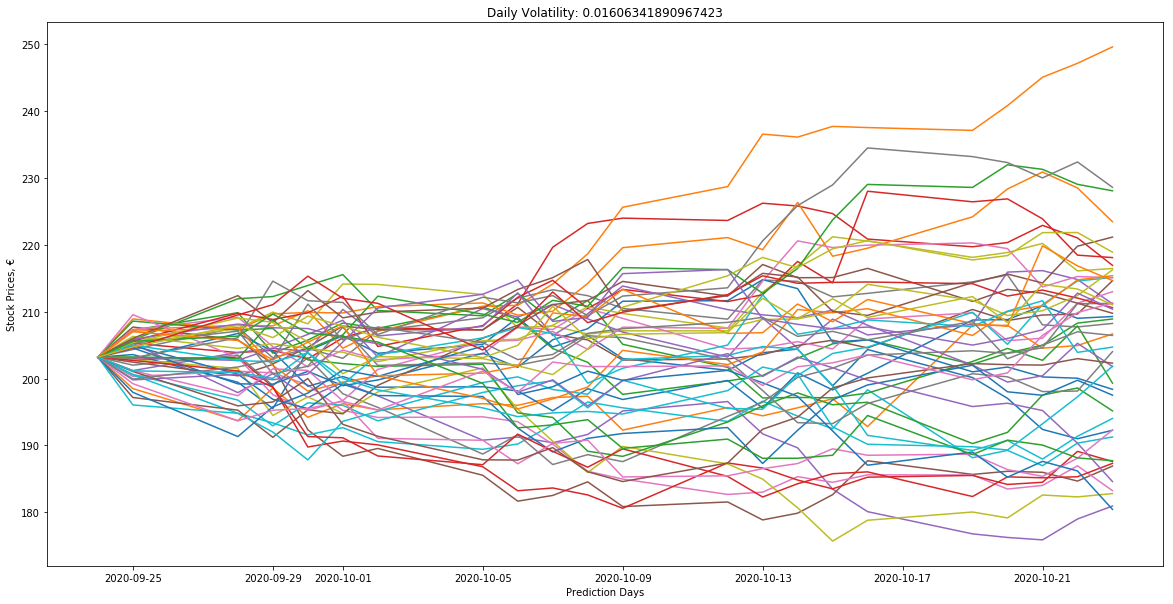

In [55]:
# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df_custom["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
plt.show()

        index           0           1           2           3           4  \
0  2020-09-24  203.190002  203.190002  203.190002  203.190002  203.190002   
1  2020-09-25  203.575499  198.496100  207.204792  205.260063  205.230728   
2  2020-09-28  199.440652  193.697115  209.832435  203.869615  197.891936   
3  2020-09-29  195.524404  198.584717  203.794305  204.209079  200.737477   
4  2020-09-30  204.126805  194.210858  205.745382  202.927696  197.164445   
5  2020-10-01  206.385100  196.247225  208.285266  206.084101  199.442486   
6  2020-10-02  203.766059  195.318230  207.494299  207.601162  197.413577   
7  2020-10-05  205.110382  196.242671  210.690582  207.251343  190.790682   
8  2020-10-06  209.093812  196.001761  208.826334  211.136726  191.266494   
9  2020-10-07  204.711833  197.156176  204.475723  219.604465  190.411016   
10 2020-10-08  206.416399  197.356540  202.411712  223.157003  191.647697   
11 2020-10-09  202.987199  192.296434  197.633296  223.949490  195.155479   

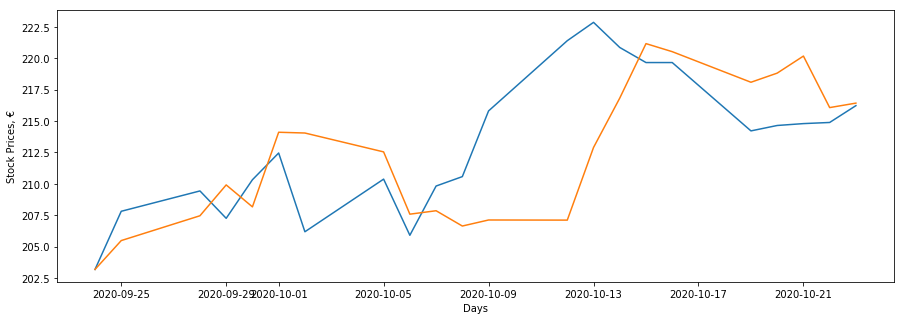

In [51]:
#Test against actual graph
#Using scikit - different article - instead of quandl
start = datetime.datetime(2020,9,24)
end = datetime.datetime(2020,10,24)
prices = web.DataReader("MSFT", 'yahoo', start, end).reset_index(drop = False)[['Date', 'Close']]

plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.plot(prices['Date'], S[8])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

In [49]:
def compute_differences(pred, actual):
    sum = 0
    for i in range(len(actual)):
        temp_min = abs(pred[i] - actual[i])
        sum += temp_min
    return sum

In [50]:
min_sum = 10000000
actual_array = prices.loc[:, 'Close']
index = -1
for i in range(len(S)):
    sum = compute_differences(S[i], actual_array)
    if(sum < min_sum):
        min_sum = sum
        index = i
        print(index)
print("Index to check is " + str(index))

0
2
3
8
Index to check is 8


In [164]:
def maxProfit (k, prices):
    # corner case
    if prices is None or len(prices) == 0: return 0
    # if k is too large, to save space, we can directly sum up profit pair by pair
    if 2*k >= len(prices): 
        return sum(max(0, prices[i]-prices[i-1]) for i in range(1, len(prices)))

    # optimized DP solution in problem III by using two rows instead of a matrix 
    n = len(prices)
    no_of_transaction = 0
    currProfit = [0 for _ in range(n)]
    prevProfit = [0 for _ in range(n)]
    for i in range(1, k+1):
        maxdiff = -prices[0]
        # assign currProfit array [last loop] to prevProfit array [this loop]
        # 1. also create an new currProfit array for futher use [easy to understand] 
        currProfit, prevProfit = [0 for _ in range(n)], currProfit
        # 2. assign prevProfit array to currprofit since currProfit[0] is still zero, which is enough here [Faster way] 
        # currProfit, prevProfit = prevProfit, currProfit
        for j in range(1, n):
            currProfit[j] = max(currProfit[j-1], prices[j]+maxdiff)
            maxdiff = max(maxdiff, prevProfit[j]-prices[j])  
        print(str(currProfit[-1]))
    # return the result
    return currProfit[-1]

In [165]:
max_profit = 0
for i in range(len(S)):
    max_profit = max(max_profit, maxProfit(10, S[i]))
    
print(max_profit)

11.343676178254384
15.896491377322803
20.20219650604338
22.410386892369047
22.410386892369047
22.410386892369047
22.410386892369047
22.410386892369047
22.410386892369047
22.410386892369047
39.28934177267638
47.49629044500213
49.48240511730134
49.96288465211728
49.96288465211728
49.96288465211728
49.96288465211728
49.96288465211728
49.96288465211728
49.96288465211728
25.75078510665415
32.88646520368701
39.87130708102217
42.46555364662055
42.46555364662055
42.46555364662055
42.46555364662055
42.46555364662055
42.46555364662055
42.46555364662055
27.407562704250296
32.460820430779705
34.10875429709523
35.6446766591248
35.92113920815072
35.92113920815072
35.92113920815072
35.92113920815072
35.92113920815072
35.92113920815072
14.373309487142649
19.639396767407277
23.910538363752863
25.346317291768543
26.553954698548722
27.305523366564643
27.305523366564643
27.305523366564643
27.305523366564643
27.305523366564643
8.470002035996657
14.818659167559957
18.075525463123938
20.665514771159422
22.20

In [166]:
def single_profit(kind, prices):
    n = len(prices)
    if n == 0:
        return 0
    temp = 0
    result = 0
    tempSell = 0
    maxPrice = prices[n - 1]
    
    buyDates = []
    sellDates = []
    buy_date = 0
    sell_date = 0
    
    for i in range(n-2, -1, -1):
        if prices[i] < maxPrice:
            result = max(result, maxPrice- prices[i])
            if result != temp:
                buyDates.append(i)
            temp = result
        
        maxPrice = max(maxPrice, prices[i])
        if maxPrice != tempSell:
            sellDates.append(i)
        tempSell = maxPrice
    
    if len(buyDates) > 0:
        buy_date = buyDates[len(buyDates) - 1]
    
    if len(sellDates) > 0:
        i = 1
        if kind == "max":
            if sellDates[len(sellDates) - 1] < buyDates[len(buyDates) - 1]:
                sell_date = sellDates[len(sellDates) - 2]
            else:
                sell_date = sellDates[len(sellDates) - 1]
        else:
            while sellDates[len(sellDates) - i] < buyDates[len(buyDates) - 1]:
                sell_date = sellDates[len(sellDates) - i - 1]
                i = i + 1
    
    return result, buy_date, sell_date


In [167]:
max_profit = 0
buy_date = 0
sell_date = 0
min_profit = 100000000000

#Best case scenario
for i in range(len(S)):
    temp_profit, temp_buy, temp_sell = single_profit("max", S[i])
#     max_profit = max(max_profit, single_profit(S[i]))
    if(temp_profit > max_profit):
        max_profit = temp_profit
        buy_date = temp_buy
        sell_date = temp_sell
    
print(max_profit)
print("Buy on " + str(buy_date))
print("Sell on " + str(sell_date))

#Worst case scenario
for i in range(len(S)):
    temp_profit, temp_buy, temp_sell = single_profit("min", S[i])
#     max_profit = max(max_profit, single_profit(S[i]))
    if(temp_profit < min_profit):
        min_profit = temp_profit
        buy_date = temp_buy
        sell_date = temp_sell
        
print(min_profit)
print("Buy on " + str(buy_date))
print("Sell on " + str(sell_date))


39.28934177267638
Buy on 11
Sell on 20
5.713294514572084
Buy on 16
Sell on 20
